In [2]:
import os
import rasterio
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

# ======= CONFIG =======
INPUT_FOLDER = r"C:\Users\user\Documents\GitHub\Nasa_Space_Apps_challenge\data\california_tif"
OUTPUT_FOLDER = r"C:\Users\user\Documents\GitHub\Nasa_Space_Apps_challenge\output"
CSV_LOG = os.path.join(OUTPUT_FOLDER, "processing_log.csv")

os.makedirs(OUTPUT_FOLDER, exist_ok=True)

# ======= HELPER =======
def compute_ndvi(red_band, nir_band):
    """Compute NDVI = (NIR - RED) / (NIR + RED)"""
    np.seterr(divide='ignore', invalid='ignore')
    ndvi = (nir_band - red_band) / (nir_band + red_band)
    ndvi = np.clip(ndvi, -1, 1)
    return ndvi

# ======= MAIN =======
records = []

tif_files = [f for f in os.listdir(INPUT_FOLDER) if f.lower().endswith(".tif")]

print(f"Found {len(tif_files)} .tif files")

for tif_file in tqdm(tif_files, desc="Processing files"):
    file_path = os.path.join(INPUT_FOLDER, tif_file)
    
    try:
        with rasterio.open(file_path) as src:
            meta = src.meta
            bands = src.count

            if bands < 2:
                print(f"⚠️ Skipping {tif_file} — not enough bands.")
                continue

            # Assume band 1 = Red, band 2 = NIR
            red = src.read(1).astype('float32')
            nir = src.read(2).astype('float32')

            ndvi = compute_ndvi(red, nir)

            # Save NDVI as GeoTIFF
            ndvi_path = os.path.join(OUTPUT_FOLDER, f"NDVI_{tif_file}")
            meta.update(dtype=rasterio.float32, count=1)
            with rasterio.open(ndvi_path, 'w', **meta) as dst:
                dst.write(ndvi, 1)

            # Save NDVI as NumPy array (.npy)
            npy_path = os.path.join(OUTPUT_FOLDER, f"{os.path.splitext(tif_file)[0]}_ndvi.npy")
            np.save(npy_path, ndvi)

            # Record metadata
            records.append({
                "filename": tif_file,
                "width": src.width,
                "height": src.height,
                "bands": bands,
                "crs": str(src.crs),
                "transform": str(src.transform),
                "ndvi_tif": ndvi_path,
                "ndvi_npy": npy_path
            })
    
    except Exception as e:
        print(f"❌ Error processing {tif_file}: {e}")

# ======= SAVE LOG =======
df = pd.DataFrame(records)
df.to_csv(CSV_LOG, index=False)
print(f"\n✅ Processing complete! Log saved to: {CSV_LOG}")
print(f"✅ NDVI .tif and .npy saved to: {OUTPUT_FOLDER}")


Found 738 .tif files


Processing files:   1%|          | 4/738 [00:00<01:09, 10.62it/s]

⚠️ Skipping HLS.S30.T10SDH.2025088T185021.v2.0.B01.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SDH.2025088T185021.v2.0.B02.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SDH.2025088T185021.v2.0.B03.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SDH.2025088T185021.v2.0.B04.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SDH.2025088T185021.v2.0.B05.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SDH.2025088T185021.v2.0.B06.tif — not enough bands.


Processing files:   1%|          | 9/738 [00:00<00:47, 15.44it/s]

⚠️ Skipping HLS.S30.T10SDH.2025088T185021.v2.0.B07.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SDH.2025088T185021.v2.0.B08.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SDH.2025088T185021.v2.0.B09.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SDH.2025088T185021.v2.0.B10.tif — not enough bands.


Processing files:   2%|▏         | 13/738 [00:00<00:51, 14.07it/s]

⚠️ Skipping HLS.S30.T10SDH.2025088T185021.v2.0.B11.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SDH.2025088T185021.v2.0.B12.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SDH.2025088T185021.v2.0.B8A.tif — not enough bands.


Processing files:   2%|▏         | 18/738 [00:01<00:41, 17.15it/s]

⚠️ Skipping HLS.S30.T10SDH.2025088T185021.v2.0.Fmask.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SDH.2025088T185021.v2.0.SAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SDH.2025088T185021.v2.0.SZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SDH.2025088T185021.v2.0.VAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SDH.2025088T185021.v2.0.VZA.tif — not enough bands.


Processing files:   3%|▎         | 21/738 [00:01<00:38, 18.86it/s]

⚠️ Skipping HLS.S30.T10SEH.2025088T185021.v2.0.B01.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SEH.2025088T185021.v2.0.B02.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SEH.2025088T185021.v2.0.B03.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SEH.2025088T185021.v2.0.B04.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SEH.2025088T185021.v2.0.B05.tif — not enough bands.


Processing files:   4%|▎         | 27/738 [00:01<00:35, 19.95it/s]

⚠️ Skipping HLS.S30.T10SEH.2025088T185021.v2.0.B06.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SEH.2025088T185021.v2.0.B07.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SEH.2025088T185021.v2.0.B08.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SEH.2025088T185021.v2.0.B09.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SEH.2025088T185021.v2.0.B10.tif — not enough bands.


Processing files:   4%|▍         | 33/738 [00:01<00:32, 21.56it/s]

⚠️ Skipping HLS.S30.T10SEH.2025088T185021.v2.0.B11.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SEH.2025088T185021.v2.0.B12.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SEH.2025088T185021.v2.0.B8A.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SEH.2025088T185021.v2.0.Fmask.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SEH.2025088T185021.v2.0.SAA.tif — not enough bands.


Processing files:   5%|▍         | 36/738 [00:02<00:31, 22.12it/s]

⚠️ Skipping HLS.S30.T10SEH.2025088T185021.v2.0.SZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SEH.2025088T185021.v2.0.VAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SEH.2025088T185021.v2.0.VZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFD.2025087T184821.v2.0.B01.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFD.2025087T184821.v2.0.B02.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFD.2025087T184821.v2.0.B03.tif — not enough bands.


Processing files:   6%|▌         | 45/738 [00:02<00:28, 24.19it/s]

⚠️ Skipping HLS.S30.T10SFD.2025087T184821.v2.0.B04.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFD.2025087T184821.v2.0.B05.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFD.2025087T184821.v2.0.B06.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFD.2025087T184821.v2.0.B07.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFD.2025087T184821.v2.0.B08.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFD.2025087T184821.v2.0.B09.tif — not enough bands.


Processing files:   7%|▋         | 51/738 [00:02<00:28, 24.53it/s]

⚠️ Skipping HLS.S30.T10SFD.2025087T184821.v2.0.B10.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFD.2025087T184821.v2.0.B11.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFD.2025087T184821.v2.0.B12.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFD.2025087T184821.v2.0.B8A.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFD.2025087T184821.v2.0.Fmask.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFD.2025087T184821.v2.0.SAA.tif — not enough bands.


Processing files:   8%|▊         | 57/738 [00:02<00:27, 24.57it/s]

⚠️ Skipping HLS.S30.T10SFD.2025087T184821.v2.0.SZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFD.2025087T184821.v2.0.VAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFD.2025087T184821.v2.0.VZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFE.2025088T185021.v2.0.B01.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFE.2025088T185021.v2.0.B02.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFE.2025088T185021.v2.0.B03.tif — not enough bands.


Processing files:   9%|▊         | 63/738 [00:03<00:27, 24.82it/s]

⚠️ Skipping HLS.S30.T10SFE.2025088T185021.v2.0.B04.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFE.2025088T185021.v2.0.B05.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFE.2025088T185021.v2.0.B06.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFE.2025088T185021.v2.0.B07.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFE.2025088T185021.v2.0.B08.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFE.2025088T185021.v2.0.B09.tif — not enough bands.


Processing files:   9%|▉         | 69/738 [00:03<00:27, 24.50it/s]

⚠️ Skipping HLS.S30.T10SFE.2025088T185021.v2.0.B10.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFE.2025088T185021.v2.0.B11.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFE.2025088T185021.v2.0.B12.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFE.2025088T185021.v2.0.B8A.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFE.2025088T185021.v2.0.Fmask.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFE.2025088T185021.v2.0.SAA.tif — not enough bands.


Processing files:  10%|▉         | 72/738 [00:03<00:27, 24.59it/s]

⚠️ Skipping HLS.S30.T10SFE.2025088T185021.v2.0.SZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFE.2025088T185021.v2.0.VAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFE.2025088T185021.v2.0.VZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFG.2025085T184031.v2.0.B01.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFG.2025085T184031.v2.0.B02.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFG.2025085T184031.v2.0.B03.tif — not enough bands.


Processing files:  11%|█         | 81/738 [00:03<00:26, 24.55it/s]

⚠️ Skipping HLS.S30.T10SFG.2025085T184031.v2.0.B04.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFG.2025085T184031.v2.0.B05.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFG.2025085T184031.v2.0.B06.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFG.2025085T184031.v2.0.B07.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFG.2025085T184031.v2.0.B08.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFG.2025085T184031.v2.0.B09.tif — not enough bands.


Processing files:  12%|█▏        | 87/738 [00:04<00:26, 24.73it/s]

⚠️ Skipping HLS.S30.T10SFG.2025085T184031.v2.0.B10.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFG.2025085T184031.v2.0.B11.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFG.2025085T184031.v2.0.B12.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFG.2025085T184031.v2.0.B8A.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFG.2025085T184031.v2.0.Fmask.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFG.2025085T184031.v2.0.SAA.tif — not enough bands.


Processing files:  12%|█▏        | 90/738 [00:04<00:26, 24.41it/s]

⚠️ Skipping HLS.S30.T10SFG.2025085T184031.v2.0.SZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFG.2025085T184031.v2.0.VAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFG.2025085T184031.v2.0.VZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFG.2025088T185021.v2.0.B01.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFG.2025088T185021.v2.0.B02.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFG.2025088T185021.v2.0.B03.tif — not enough bands.


Processing files:  13%|█▎        | 96/738 [00:04<00:27, 23.39it/s]

⚠️ Skipping HLS.S30.T10SFG.2025088T185021.v2.0.B04.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFG.2025088T185021.v2.0.B05.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFG.2025088T185021.v2.0.B06.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFG.2025088T185021.v2.0.B07.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFG.2025088T185021.v2.0.B08.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFG.2025088T185021.v2.0.B09.tif — not enough bands.


Processing files:  14%|█▍        | 105/738 [00:04<00:27, 23.39it/s]

⚠️ Skipping HLS.S30.T10SFG.2025088T185021.v2.0.B10.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFG.2025088T185021.v2.0.B11.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFG.2025088T185021.v2.0.B12.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFG.2025088T185021.v2.0.B8A.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFG.2025088T185021.v2.0.Fmask.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFG.2025088T185021.v2.0.SAA.tif — not enough bands.


Processing files:  15%|█▍        | 108/738 [00:05<00:26, 23.36it/s]

⚠️ Skipping HLS.S30.T10SFG.2025088T185021.v2.0.SZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFG.2025088T185021.v2.0.VAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFG.2025088T185021.v2.0.VZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFH.2025085T184031.v2.0.B01.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFH.2025085T184031.v2.0.B02.tif — not enough bands.


Processing files:  15%|█▌        | 114/738 [00:05<00:28, 21.63it/s]

⚠️ Skipping HLS.S30.T10SFH.2025085T184031.v2.0.B03.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFH.2025085T184031.v2.0.B04.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFH.2025085T184031.v2.0.B05.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFH.2025085T184031.v2.0.B06.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFH.2025085T184031.v2.0.B07.tif — not enough bands.


Processing files:  16%|█▋        | 120/738 [00:05<00:27, 22.62it/s]

⚠️ Skipping HLS.S30.T10SFH.2025085T184031.v2.0.B08.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFH.2025085T184031.v2.0.B09.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFH.2025085T184031.v2.0.B10.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFH.2025085T184031.v2.0.B11.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFH.2025085T184031.v2.0.B12.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFH.2025085T184031.v2.0.B8A.tif — not enough bands.


Processing files:  17%|█▋        | 126/738 [00:05<00:25, 23.81it/s]

⚠️ Skipping HLS.S30.T10SFH.2025085T184031.v2.0.Fmask.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFH.2025085T184031.v2.0.SAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFH.2025085T184031.v2.0.SZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFH.2025085T184031.v2.0.VAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFH.2025085T184031.v2.0.VZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFH.2025088T185021.v2.0.B01.tif — not enough bands.


Processing files:  18%|█▊        | 132/738 [00:06<00:24, 24.35it/s]

⚠️ Skipping HLS.S30.T10SFH.2025088T185021.v2.0.B02.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFH.2025088T185021.v2.0.B03.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFH.2025088T185021.v2.0.B04.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFH.2025088T185021.v2.0.B05.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFH.2025088T185021.v2.0.B06.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFH.2025088T185021.v2.0.B07.tif — not enough bands.


Processing files:  18%|█▊        | 135/738 [00:06<00:24, 24.25it/s]

⚠️ Skipping HLS.S30.T10SFH.2025088T185021.v2.0.B08.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFH.2025088T185021.v2.0.B09.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFH.2025088T185021.v2.0.B10.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFH.2025088T185021.v2.0.B11.tif — not enough bands.


Processing files:  19%|█▉        | 141/738 [00:06<00:28, 20.76it/s]

⚠️ Skipping HLS.S30.T10SFH.2025088T185021.v2.0.B12.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFH.2025088T185021.v2.0.B8A.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFH.2025088T185021.v2.0.Fmask.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFH.2025088T185021.v2.0.SAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFH.2025088T185021.v2.0.SZA.tif — not enough bands.


Processing files:  20%|█▉        | 147/738 [00:06<00:26, 22.05it/s]

⚠️ Skipping HLS.S30.T10SFH.2025088T185021.v2.0.VAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFH.2025088T185021.v2.0.VZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFJ.2025085T184031.v2.0.B01.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFJ.2025085T184031.v2.0.B02.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFJ.2025085T184031.v2.0.B03.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFJ.2025085T184031.v2.0.B04.tif — not enough bands.


Processing files:  21%|██        | 153/738 [00:07<00:25, 23.02it/s]

⚠️ Skipping HLS.S30.T10SFJ.2025085T184031.v2.0.B05.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFJ.2025085T184031.v2.0.B06.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFJ.2025085T184031.v2.0.B07.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFJ.2025085T184031.v2.0.B08.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFJ.2025085T184031.v2.0.B09.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFJ.2025085T184031.v2.0.B10.tif — not enough bands.


Processing files:  22%|██▏       | 159/738 [00:07<00:26, 22.20it/s]

⚠️ Skipping HLS.S30.T10SFJ.2025085T184031.v2.0.B11.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFJ.2025085T184031.v2.0.B12.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFJ.2025085T184031.v2.0.B8A.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFJ.2025085T184031.v2.0.Fmask.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFJ.2025085T184031.v2.0.SAA.tif — not enough bands.


Processing files:  22%|██▏       | 162/738 [00:07<00:27, 20.96it/s]

⚠️ Skipping HLS.S30.T10SFJ.2025085T184031.v2.0.SZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFJ.2025085T184031.v2.0.VAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SFJ.2025085T184031.v2.0.VZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGF.2025085T184031.v2.0.B01.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGF.2025085T184031.v2.0.B02.tif — not enough bands.


Processing files:  23%|██▎       | 167/738 [00:07<00:30, 18.43it/s]

⚠️ Skipping HLS.S30.T10SGF.2025085T184031.v2.0.B03.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGF.2025085T184031.v2.0.B04.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGF.2025085T184031.v2.0.B05.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGF.2025085T184031.v2.0.B06.tif — not enough bands.


Processing files:  23%|██▎       | 171/738 [00:07<00:31, 18.21it/s]

⚠️ Skipping HLS.S30.T10SGF.2025085T184031.v2.0.B07.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGF.2025085T184031.v2.0.B08.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGF.2025085T184031.v2.0.B09.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGF.2025085T184031.v2.0.B10.tif — not enough bands.


Processing files:  24%|██▎       | 175/738 [00:08<00:30, 18.25it/s]

⚠️ Skipping HLS.S30.T10SGF.2025085T184031.v2.0.B11.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGF.2025085T184031.v2.0.B12.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGF.2025085T184031.v2.0.B8A.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGF.2025085T184031.v2.0.Fmask.tif — not enough bands.


Processing files:  24%|██▍       | 179/738 [00:08<00:37, 14.95it/s]

⚠️ Skipping HLS.S30.T10SGF.2025085T184031.v2.0.SAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGF.2025085T184031.v2.0.SZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGF.2025085T184031.v2.0.VAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGF.2025085T184031.v2.0.VZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGF.2025088T185021.v2.0.B01.tif — not enough bands.


Processing files:  25%|██▌       | 185/738 [00:08<00:33, 16.62it/s]

⚠️ Skipping HLS.S30.T10SGF.2025088T185021.v2.0.B02.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGF.2025088T185021.v2.0.B03.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGF.2025088T185021.v2.0.B04.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGF.2025088T185021.v2.0.B05.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGF.2025088T185021.v2.0.B06.tif — not enough bands.


Processing files:  26%|██▌       | 191/738 [00:09<00:28, 19.49it/s]

⚠️ Skipping HLS.S30.T10SGF.2025088T185021.v2.0.B07.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGF.2025088T185021.v2.0.B08.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGF.2025088T185021.v2.0.B09.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGF.2025088T185021.v2.0.B10.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGF.2025088T185021.v2.0.B11.tif — not enough bands.


Processing files:  26%|██▋       | 195/738 [00:09<00:27, 19.39it/s]

⚠️ Skipping HLS.S30.T10SGF.2025088T185021.v2.0.B12.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGF.2025088T185021.v2.0.B8A.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGF.2025088T185021.v2.0.Fmask.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGF.2025088T185021.v2.0.SAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGF.2025088T185021.v2.0.SZA.tif — not enough bands.


Processing files:  27%|██▋       | 201/738 [00:09<00:24, 21.66it/s]

⚠️ Skipping HLS.S30.T10SGF.2025088T185021.v2.0.VAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGF.2025088T185021.v2.0.VZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGG.2025085T184031.v2.0.B01.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGG.2025085T184031.v2.0.B02.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGG.2025085T184031.v2.0.B03.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGG.2025085T184031.v2.0.B04.tif — not enough bands.


Processing files:  28%|██▊       | 207/738 [00:09<00:22, 23.31it/s]

⚠️ Skipping HLS.S30.T10SGG.2025085T184031.v2.0.B05.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGG.2025085T184031.v2.0.B06.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGG.2025085T184031.v2.0.B07.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGG.2025085T184031.v2.0.B08.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGG.2025085T184031.v2.0.B09.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGG.2025085T184031.v2.0.B10.tif — not enough bands.


Processing files:  29%|██▉       | 213/738 [00:10<00:20, 25.29it/s]

⚠️ Skipping HLS.S30.T10SGG.2025085T184031.v2.0.B11.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGG.2025085T184031.v2.0.B12.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGG.2025085T184031.v2.0.B8A.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGG.2025085T184031.v2.0.Fmask.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGG.2025085T184031.v2.0.SAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGG.2025085T184031.v2.0.SZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGG.2025085T184031.v2.0.VAA.tif — not enough bands.


Processing files:  29%|██▉       | 217/738 [00:10<00:19, 26.71it/s]

⚠️ Skipping HLS.S30.T10SGG.2025085T184031.v2.0.VZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGG.2025088T185021.v2.0.B01.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGG.2025088T185021.v2.0.B02.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGG.2025088T185021.v2.0.B03.tif — not enough bands.


Processing files:  30%|███       | 223/738 [00:10<00:22, 23.16it/s]

⚠️ Skipping HLS.S30.T10SGG.2025088T185021.v2.0.B04.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGG.2025088T185021.v2.0.B05.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGG.2025088T185021.v2.0.B06.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGG.2025088T185021.v2.0.B07.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGG.2025088T185021.v2.0.B08.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGG.2025088T185021.v2.0.B09.tif — not enough bands.


Processing files:  31%|███       | 229/738 [00:10<00:20, 24.57it/s]

⚠️ Skipping HLS.S30.T10SGG.2025088T185021.v2.0.B10.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGG.2025088T185021.v2.0.B11.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGG.2025088T185021.v2.0.B12.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGG.2025088T185021.v2.0.B8A.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGG.2025088T185021.v2.0.Fmask.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGG.2025088T185021.v2.0.SAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGG.2025088T185021.v2.0.SZA.tif — not enough bands.


Processing files:  32%|███▏      | 236/738 [00:10<00:18, 26.61it/s]

⚠️ Skipping HLS.S30.T10SGG.2025088T185021.v2.0.VAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGG.2025088T185021.v2.0.VZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGH.2025085T184031.v2.0.B01.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGH.2025085T184031.v2.0.B02.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGH.2025085T184031.v2.0.B03.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGH.2025085T184031.v2.0.B04.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGH.2025085T184031.v2.0.B05.tif — not enough bands.


Processing files:  33%|███▎      | 243/738 [00:11<00:17, 27.73it/s]

⚠️ Skipping HLS.S30.T10SGH.2025085T184031.v2.0.B06.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGH.2025085T184031.v2.0.B07.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGH.2025085T184031.v2.0.B08.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGH.2025085T184031.v2.0.B09.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGH.2025085T184031.v2.0.B10.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGH.2025085T184031.v2.0.B11.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGH.2025085T184031.v2.0.B12.tif — not enough bands.


Processing files:  34%|███▍      | 250/738 [00:11<00:17, 28.01it/s]

⚠️ Skipping HLS.S30.T10SGH.2025085T184031.v2.0.B8A.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGH.2025085T184031.v2.0.Fmask.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGH.2025085T184031.v2.0.SAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGH.2025085T184031.v2.0.SZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGH.2025085T184031.v2.0.VAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGH.2025085T184031.v2.0.VZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGH.2025088T185021.v2.0.B01.tif — not enough bands.


Processing files:  35%|███▍      | 257/738 [00:11<00:17, 27.98it/s]

⚠️ Skipping HLS.S30.T10SGH.2025088T185021.v2.0.B02.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGH.2025088T185021.v2.0.B03.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGH.2025088T185021.v2.0.B04.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGH.2025088T185021.v2.0.B05.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGH.2025088T185021.v2.0.B06.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGH.2025088T185021.v2.0.B07.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGH.2025088T185021.v2.0.B08.tif — not enough bands.


Processing files:  35%|███▌      | 261/738 [00:11<00:16, 28.60it/s]

⚠️ Skipping HLS.S30.T10SGH.2025088T185021.v2.0.B09.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGH.2025088T185021.v2.0.B10.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGH.2025088T185021.v2.0.B11.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGH.2025088T185021.v2.0.B12.tif — not enough bands.


Processing files:  37%|███▋      | 270/738 [00:12<00:19, 24.08it/s]

⚠️ Skipping HLS.S30.T10SGH.2025088T185021.v2.0.B8A.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGH.2025088T185021.v2.0.Fmask.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGH.2025088T185021.v2.0.SAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGH.2025088T185021.v2.0.SZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGH.2025088T185021.v2.0.VAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGH.2025088T185021.v2.0.VZA.tif — not enough bands.


Processing files:  37%|███▋      | 276/738 [00:12<00:17, 25.71it/s]

⚠️ Skipping HLS.S30.T10SGJ.2025085T184031.v2.0.B01.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGJ.2025085T184031.v2.0.B02.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGJ.2025085T184031.v2.0.B03.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGJ.2025085T184031.v2.0.B04.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGJ.2025085T184031.v2.0.B05.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGJ.2025085T184031.v2.0.B06.tif — not enough bands.


Processing files:  38%|███▊      | 282/738 [00:12<00:17, 25.89it/s]

⚠️ Skipping HLS.S30.T10SGJ.2025085T184031.v2.0.B07.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGJ.2025085T184031.v2.0.B08.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGJ.2025085T184031.v2.0.B09.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGJ.2025085T184031.v2.0.B10.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGJ.2025085T184031.v2.0.B11.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGJ.2025085T184031.v2.0.B12.tif — not enough bands.


Processing files:  39%|███▊      | 285/738 [00:12<00:17, 25.63it/s]

⚠️ Skipping HLS.S30.T10SGJ.2025085T184031.v2.0.B8A.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGJ.2025085T184031.v2.0.Fmask.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGJ.2025085T184031.v2.0.SAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGJ.2025085T184031.v2.0.SZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGJ.2025085T184031.v2.0.VAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGJ.2025085T184031.v2.0.VZA.tif — not enough bands.


Processing files:  39%|███▉      | 291/738 [00:13<00:18, 23.90it/s]

⚠️ Skipping HLS.S30.T10SGJ.2025088T185021.v2.0.B01.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGJ.2025088T185021.v2.0.B02.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGJ.2025088T185021.v2.0.B03.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGJ.2025088T185021.v2.0.B04.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGJ.2025088T185021.v2.0.B05.tif — not enough bands.


Processing files:  40%|████      | 297/738 [00:13<00:20, 21.64it/s]

⚠️ Skipping HLS.S30.T10SGJ.2025088T185021.v2.0.B06.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGJ.2025088T185021.v2.0.B07.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGJ.2025088T185021.v2.0.B08.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGJ.2025088T185021.v2.0.B09.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGJ.2025088T185021.v2.0.B10.tif — not enough bands.


Processing files:  41%|████      | 300/738 [00:13<00:20, 21.90it/s]

⚠️ Skipping HLS.S30.T10SGJ.2025088T185021.v2.0.B11.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGJ.2025088T185021.v2.0.B12.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGJ.2025088T185021.v2.0.B8A.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGJ.2025088T185021.v2.0.Fmask.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGJ.2025088T185021.v2.0.SAA.tif — not enough bands.


Processing files:  41%|████▏     | 306/738 [00:13<00:20, 20.98it/s]

⚠️ Skipping HLS.S30.T10SGJ.2025088T185021.v2.0.SZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGJ.2025088T185021.v2.0.VAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10SGJ.2025088T185021.v2.0.VZA.tif — not enough bands.


Processing files:  42%|████▏     | 309/738 [00:14<00:23, 18.09it/s]

⚠️ Skipping HLS.S30.T10TEK.2025088T185021.v2.0.B01.tif — not enough bands.
⚠️ Skipping HLS.S30.T10TEK.2025088T185021.v2.0.B02.tif — not enough bands.
⚠️ Skipping HLS.S30.T10TEK.2025088T185021.v2.0.B03.tif — not enough bands.
⚠️ Skipping HLS.S30.T10TEK.2025088T185021.v2.0.B04.tif — not enough bands.


Processing files:  42%|████▏     | 313/738 [00:14<00:23, 17.89it/s]

⚠️ Skipping HLS.S30.T10TEK.2025088T185021.v2.0.B05.tif — not enough bands.
⚠️ Skipping HLS.S30.T10TEK.2025088T185021.v2.0.B06.tif — not enough bands.
⚠️ Skipping HLS.S30.T10TEK.2025088T185021.v2.0.B07.tif — not enough bands.
⚠️ Skipping HLS.S30.T10TEK.2025088T185021.v2.0.B08.tif — not enough bands.
⚠️ Skipping HLS.S30.T10TEK.2025088T185021.v2.0.B09.tif — not enough bands.


Processing files:  43%|████▎     | 318/738 [00:14<00:22, 19.06it/s]

⚠️ Skipping HLS.S30.T10TEK.2025088T185021.v2.0.B10.tif — not enough bands.
⚠️ Skipping HLS.S30.T10TEK.2025088T185021.v2.0.B11.tif — not enough bands.
⚠️ Skipping HLS.S30.T10TEK.2025088T185021.v2.0.B12.tif — not enough bands.
⚠️ Skipping HLS.S30.T10TEK.2025088T185021.v2.0.B8A.tif — not enough bands.
⚠️ Skipping HLS.S30.T10TEK.2025088T185021.v2.0.Fmask.tif — not enough bands.


Processing files:  44%|████▍     | 323/738 [00:14<00:21, 19.48it/s]

⚠️ Skipping HLS.S30.T10TEK.2025088T185021.v2.0.SAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10TEK.2025088T185021.v2.0.SZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10TEK.2025088T185021.v2.0.VAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10TEK.2025088T185021.v2.0.VZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10TGK.2025085T184031.v2.0.B01.tif — not enough bands.


Processing files:  45%|████▍     | 329/738 [00:15<00:19, 20.73it/s]

⚠️ Skipping HLS.S30.T10TGK.2025085T184031.v2.0.B02.tif — not enough bands.
⚠️ Skipping HLS.S30.T10TGK.2025085T184031.v2.0.B03.tif — not enough bands.
⚠️ Skipping HLS.S30.T10TGK.2025085T184031.v2.0.B04.tif — not enough bands.
⚠️ Skipping HLS.S30.T10TGK.2025085T184031.v2.0.B05.tif — not enough bands.
⚠️ Skipping HLS.S30.T10TGK.2025085T184031.v2.0.B06.tif — not enough bands.


Processing files:  45%|████▌     | 335/738 [00:15<00:19, 20.91it/s]

⚠️ Skipping HLS.S30.T10TGK.2025085T184031.v2.0.B07.tif — not enough bands.
⚠️ Skipping HLS.S30.T10TGK.2025085T184031.v2.0.B08.tif — not enough bands.
⚠️ Skipping HLS.S30.T10TGK.2025085T184031.v2.0.B09.tif — not enough bands.
⚠️ Skipping HLS.S30.T10TGK.2025085T184031.v2.0.B10.tif — not enough bands.
⚠️ Skipping HLS.S30.T10TGK.2025085T184031.v2.0.B11.tif — not enough bands.


Processing files:  46%|████▌     | 338/738 [00:15<00:19, 20.53it/s]

⚠️ Skipping HLS.S30.T10TGK.2025085T184031.v2.0.B12.tif — not enough bands.
⚠️ Skipping HLS.S30.T10TGK.2025085T184031.v2.0.B8A.tif — not enough bands.
⚠️ Skipping HLS.S30.T10TGK.2025085T184031.v2.0.Fmask.tif — not enough bands.
⚠️ Skipping HLS.S30.T10TGK.2025085T184031.v2.0.SAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10TGK.2025085T184031.v2.0.SZA.tif — not enough bands.


Processing files:  46%|████▋     | 343/738 [00:15<00:22, 17.38it/s]

⚠️ Skipping HLS.S30.T10TGK.2025085T184031.v2.0.VAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10TGK.2025085T184031.v2.0.VZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10TGL.2025085T184031.v2.0.B01.tif — not enough bands.
⚠️ Skipping HLS.S30.T10TGL.2025085T184031.v2.0.B02.tif — not enough bands.
⚠️ Skipping HLS.S30.T10TGL.2025085T184031.v2.0.B03.tif — not enough bands.


Processing files:  47%|████▋     | 349/738 [00:16<00:19, 19.96it/s]

⚠️ Skipping HLS.S30.T10TGL.2025085T184031.v2.0.B04.tif — not enough bands.
⚠️ Skipping HLS.S30.T10TGL.2025085T184031.v2.0.B05.tif — not enough bands.
⚠️ Skipping HLS.S30.T10TGL.2025085T184031.v2.0.B06.tif — not enough bands.
⚠️ Skipping HLS.S30.T10TGL.2025085T184031.v2.0.B07.tif — not enough bands.
⚠️ Skipping HLS.S30.T10TGL.2025085T184031.v2.0.B08.tif — not enough bands.
⚠️ Skipping HLS.S30.T10TGL.2025085T184031.v2.0.B09.tif — not enough bands.


Processing files:  48%|████▊     | 355/738 [00:16<00:17, 21.61it/s]

⚠️ Skipping HLS.S30.T10TGL.2025085T184031.v2.0.B10.tif — not enough bands.
⚠️ Skipping HLS.S30.T10TGL.2025085T184031.v2.0.B11.tif — not enough bands.
⚠️ Skipping HLS.S30.T10TGL.2025085T184031.v2.0.B12.tif — not enough bands.
⚠️ Skipping HLS.S30.T10TGL.2025085T184031.v2.0.B8A.tif — not enough bands.
⚠️ Skipping HLS.S30.T10TGL.2025085T184031.v2.0.Fmask.tif — not enough bands.
⚠️ Skipping HLS.S30.T10TGL.2025085T184031.v2.0.SAA.tif — not enough bands.


Processing files:  49%|████▉     | 361/738 [00:16<00:16, 22.25it/s]

⚠️ Skipping HLS.S30.T10TGL.2025085T184031.v2.0.SZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10TGL.2025085T184031.v2.0.VAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T10TGL.2025085T184031.v2.0.VZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKA.2025085T184031.v2.0.B01.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKA.2025085T184031.v2.0.B02.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKA.2025085T184031.v2.0.B03.tif — not enough bands.


Processing files:  50%|████▉     | 367/738 [00:16<00:17, 21.66it/s]

⚠️ Skipping HLS.S30.T11SKA.2025085T184031.v2.0.B04.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKA.2025085T184031.v2.0.B05.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKA.2025085T184031.v2.0.B06.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKA.2025085T184031.v2.0.B07.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKA.2025085T184031.v2.0.B08.tif — not enough bands.


Processing files:  51%|█████     | 373/738 [00:17<00:16, 21.53it/s]

⚠️ Skipping HLS.S30.T11SKA.2025085T184031.v2.0.B09.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKA.2025085T184031.v2.0.B10.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKA.2025085T184031.v2.0.B11.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKA.2025085T184031.v2.0.B12.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKA.2025085T184031.v2.0.B8A.tif — not enough bands.


Processing files:  51%|█████     | 376/738 [00:17<00:16, 21.86it/s]

⚠️ Skipping HLS.S30.T11SKA.2025085T184031.v2.0.Fmask.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKA.2025085T184031.v2.0.SAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKA.2025085T184031.v2.0.SZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKA.2025085T184031.v2.0.VAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKA.2025085T184031.v2.0.VZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKB.2025085T184031.v2.0.B01.tif — not enough bands.


Processing files:  52%|█████▏    | 382/738 [00:17<00:18, 18.82it/s]

⚠️ Skipping HLS.S30.T11SKB.2025085T184031.v2.0.B02.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKB.2025085T184031.v2.0.B03.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKB.2025085T184031.v2.0.B04.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKB.2025085T184031.v2.0.B05.tif — not enough bands.


Processing files:  53%|█████▎    | 388/738 [00:17<00:17, 20.22it/s]

⚠️ Skipping HLS.S30.T11SKB.2025085T184031.v2.0.B06.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKB.2025085T184031.v2.0.B07.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKB.2025085T184031.v2.0.B08.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKB.2025085T184031.v2.0.B09.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKB.2025085T184031.v2.0.B10.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKB.2025085T184031.v2.0.B11.tif — not enough bands.


Processing files:  53%|█████▎    | 394/738 [00:18<00:15, 21.78it/s]

⚠️ Skipping HLS.S30.T11SKB.2025085T184031.v2.0.B12.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKB.2025085T184031.v2.0.B8A.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKB.2025085T184031.v2.0.Fmask.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKB.2025085T184031.v2.0.SAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKB.2025085T184031.v2.0.SZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKB.2025085T184031.v2.0.VAA.tif — not enough bands.


Processing files:  54%|█████▍    | 400/738 [00:18<00:14, 22.78it/s]

⚠️ Skipping HLS.S30.T11SKB.2025085T184031.v2.0.VZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKB.2025088T185021.v2.0.B01.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKB.2025088T185021.v2.0.B02.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKB.2025088T185021.v2.0.B03.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKB.2025088T185021.v2.0.B04.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKB.2025088T185021.v2.0.B05.tif — not enough bands.


Processing files:  55%|█████▍    | 403/738 [00:18<00:15, 22.03it/s]

⚠️ Skipping HLS.S30.T11SKB.2025088T185021.v2.0.B06.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKB.2025088T185021.v2.0.B07.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKB.2025088T185021.v2.0.B08.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKB.2025088T185021.v2.0.B09.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKB.2025088T185021.v2.0.B10.tif — not enough bands.


Processing files:  55%|█████▌    | 409/738 [00:18<00:15, 20.68it/s]

⚠️ Skipping HLS.S30.T11SKB.2025088T185021.v2.0.B11.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKB.2025088T185021.v2.0.B12.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKB.2025088T185021.v2.0.B8A.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKB.2025088T185021.v2.0.Fmask.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKB.2025088T185021.v2.0.SAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKB.2025088T185021.v2.0.SZA.tif — not enough bands.


Processing files:  57%|█████▋    | 418/738 [00:19<00:13, 23.25it/s]

⚠️ Skipping HLS.S30.T11SKB.2025088T185021.v2.0.VAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKB.2025088T185021.v2.0.VZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKC.2025085T184031.v2.0.B01.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKC.2025085T184031.v2.0.B02.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKC.2025085T184031.v2.0.B03.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKC.2025085T184031.v2.0.B04.tif — not enough bands.


Processing files:  57%|█████▋    | 421/738 [00:19<00:13, 22.79it/s]

⚠️ Skipping HLS.S30.T11SKC.2025085T184031.v2.0.B05.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKC.2025085T184031.v2.0.B06.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKC.2025085T184031.v2.0.B07.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKC.2025085T184031.v2.0.B08.tif — not enough bands.


Processing files:  57%|█████▋    | 424/738 [00:19<00:16, 18.66it/s]

⚠️ Skipping HLS.S30.T11SKC.2025085T184031.v2.0.B09.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKC.2025085T184031.v2.0.B10.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKC.2025085T184031.v2.0.B11.tif — not enough bands.


Processing files:  58%|█████▊    | 429/738 [00:19<00:17, 17.63it/s]

⚠️ Skipping HLS.S30.T11SKC.2025085T184031.v2.0.B12.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKC.2025085T184031.v2.0.B8A.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKC.2025085T184031.v2.0.Fmask.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKC.2025085T184031.v2.0.SAA.tif — not enough bands.


Processing files:  59%|█████▊    | 433/738 [00:20<00:17, 17.82it/s]

⚠️ Skipping HLS.S30.T11SKC.2025085T184031.v2.0.SZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKC.2025085T184031.v2.0.VAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKC.2025085T184031.v2.0.VZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKC.2025088T185021.v2.0.B01.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKC.2025088T185021.v2.0.B02.tif — not enough bands.


Processing files:  59%|█████▉    | 438/738 [00:20<00:15, 18.99it/s]

⚠️ Skipping HLS.S30.T11SKC.2025088T185021.v2.0.B03.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKC.2025088T185021.v2.0.B04.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKC.2025088T185021.v2.0.B05.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKC.2025088T185021.v2.0.B06.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKC.2025088T185021.v2.0.B07.tif — not enough bands.


Processing files:  60%|█████▉    | 442/738 [00:20<00:16, 18.36it/s]

⚠️ Skipping HLS.S30.T11SKC.2025088T185021.v2.0.B08.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKC.2025088T185021.v2.0.B09.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKC.2025088T185021.v2.0.B10.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKC.2025088T185021.v2.0.B11.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKC.2025088T185021.v2.0.B12.tif — not enough bands.


Processing files:  61%|██████    | 447/738 [00:20<00:16, 17.80it/s]

⚠️ Skipping HLS.S30.T11SKC.2025088T185021.v2.0.B8A.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKC.2025088T185021.v2.0.Fmask.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKC.2025088T185021.v2.0.SAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKC.2025088T185021.v2.0.SZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKC.2025088T185021.v2.0.VAA.tif — not enough bands.


Processing files:  61%|██████    | 452/738 [00:21<00:16, 16.94it/s]

⚠️ Skipping HLS.S30.T11SKC.2025088T185021.v2.0.VZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKD.2025085T184031.v2.0.B01.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKD.2025085T184031.v2.0.B02.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKD.2025085T184031.v2.0.B03.tif — not enough bands.


Processing files:  62%|██████▏   | 456/738 [00:21<00:17, 16.35it/s]

⚠️ Skipping HLS.S30.T11SKD.2025085T184031.v2.0.B04.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKD.2025085T184031.v2.0.B05.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKD.2025085T184031.v2.0.B06.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKD.2025085T184031.v2.0.B07.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKD.2025085T184031.v2.0.B08.tif — not enough bands.


Processing files:  62%|██████▏   | 461/738 [00:21<00:15, 17.87it/s]

⚠️ Skipping HLS.S30.T11SKD.2025085T184031.v2.0.B09.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKD.2025085T184031.v2.0.B10.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKD.2025085T184031.v2.0.B11.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKD.2025085T184031.v2.0.B12.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKD.2025085T184031.v2.0.B8A.tif — not enough bands.


Processing files:  63%|██████▎   | 466/738 [00:22<00:15, 18.06it/s]

⚠️ Skipping HLS.S30.T11SKD.2025085T184031.v2.0.Fmask.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKD.2025085T184031.v2.0.SAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKD.2025085T184031.v2.0.SZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKD.2025085T184031.v2.0.VAA.tif — not enough bands.


Processing files:  64%|██████▎   | 470/738 [00:22<00:15, 17.59it/s]

⚠️ Skipping HLS.S30.T11SKD.2025085T184031.v2.0.VZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKD.2025088T185021.v2.0.B01.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKD.2025088T185021.v2.0.B02.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKD.2025088T185021.v2.0.B03.tif — not enough bands.


Processing files:  64%|██████▍   | 474/738 [00:22<00:14, 17.82it/s]

⚠️ Skipping HLS.S30.T11SKD.2025088T185021.v2.0.B04.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKD.2025088T185021.v2.0.B05.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKD.2025088T185021.v2.0.B06.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKD.2025088T185021.v2.0.B07.tif — not enough bands.


Processing files:  65%|██████▍   | 478/738 [00:22<00:14, 17.53it/s]

⚠️ Skipping HLS.S30.T11SKD.2025088T185021.v2.0.B08.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKD.2025088T185021.v2.0.B09.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKD.2025088T185021.v2.0.B10.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKD.2025088T185021.v2.0.B11.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKD.2025088T185021.v2.0.B12.tif — not enough bands.


Processing files:  65%|██████▌   | 481/738 [00:22<00:14, 18.22it/s]

⚠️ Skipping HLS.S30.T11SKD.2025088T185021.v2.0.B8A.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKD.2025088T185021.v2.0.Fmask.tif — not enough bands.


Processing files:  66%|██████▌   | 485/738 [00:23<00:17, 14.30it/s]

⚠️ Skipping HLS.S30.T11SKD.2025088T185021.v2.0.SAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKD.2025088T185021.v2.0.SZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKD.2025088T185021.v2.0.VAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKD.2025088T185021.v2.0.VZA.tif — not enough bands.


Processing files:  66%|██████▋   | 489/738 [00:23<00:15, 15.70it/s]

⚠️ Skipping HLS.S30.T11SKT.2025087T182919.v2.0.B01.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKT.2025087T182919.v2.0.B02.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKT.2025087T182919.v2.0.B03.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKT.2025087T182919.v2.0.B04.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKT.2025087T182919.v2.0.B05.tif — not enough bands.


Processing files:  67%|██████▋   | 494/738 [00:23<00:13, 17.47it/s]

⚠️ Skipping HLS.S30.T11SKT.2025087T182919.v2.0.B06.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKT.2025087T182919.v2.0.B07.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKT.2025087T182919.v2.0.B08.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKT.2025087T182919.v2.0.B09.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKT.2025087T182919.v2.0.B10.tif — not enough bands.


Processing files:  68%|██████▊   | 499/738 [00:23<00:13, 18.34it/s]

⚠️ Skipping HLS.S30.T11SKT.2025087T182919.v2.0.B11.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKT.2025087T182919.v2.0.B12.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKT.2025087T182919.v2.0.B8A.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKT.2025087T182919.v2.0.Fmask.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKT.2025087T182919.v2.0.SAA.tif — not enough bands.


Processing files:  68%|██████▊   | 505/738 [00:24<00:11, 20.22it/s]

⚠️ Skipping HLS.S30.T11SKT.2025087T182919.v2.0.SZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKT.2025087T182919.v2.0.VAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKT.2025087T182919.v2.0.VZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKT.2025087T184821.v2.0.B01.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKT.2025087T184821.v2.0.B02.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKT.2025087T184821.v2.0.B03.tif — not enough bands.


Processing files:  69%|██████▉   | 511/738 [00:24<00:11, 20.09it/s]

⚠️ Skipping HLS.S30.T11SKT.2025087T184821.v2.0.B04.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKT.2025087T184821.v2.0.B05.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKT.2025087T184821.v2.0.B06.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKT.2025087T184821.v2.0.B07.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKT.2025087T184821.v2.0.B08.tif — not enough bands.


Processing files:  70%|██████▉   | 514/738 [00:24<00:11, 19.24it/s]

⚠️ Skipping HLS.S30.T11SKT.2025087T184821.v2.0.B09.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKT.2025087T184821.v2.0.B10.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKT.2025087T184821.v2.0.B11.tif — not enough bands.


Processing files:  70%|███████   | 518/738 [00:25<00:13, 16.45it/s]

⚠️ Skipping HLS.S30.T11SKT.2025087T184821.v2.0.B12.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKT.2025087T184821.v2.0.B8A.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKT.2025087T184821.v2.0.Fmask.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKT.2025087T184821.v2.0.SAA.tif — not enough bands.


Processing files:  71%|███████   | 522/738 [00:25<00:12, 17.35it/s]

⚠️ Skipping HLS.S30.T11SKT.2025087T184821.v2.0.SZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKT.2025087T184821.v2.0.VAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKT.2025087T184821.v2.0.VZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKV.2025085T184031.v2.0.B01.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKV.2025085T184031.v2.0.B02.tif — not enough bands.


Processing files:  72%|███████▏  | 528/738 [00:25<00:11, 17.98it/s]

⚠️ Skipping HLS.S30.T11SKV.2025085T184031.v2.0.B03.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKV.2025085T184031.v2.0.B04.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKV.2025085T184031.v2.0.B05.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKV.2025085T184031.v2.0.B06.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKV.2025085T184031.v2.0.B07.tif — not enough bands.


Processing files:  72%|███████▏  | 532/738 [00:25<00:12, 15.92it/s]

⚠️ Skipping HLS.S30.T11SKV.2025085T184031.v2.0.B08.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKV.2025085T184031.v2.0.B09.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKV.2025085T184031.v2.0.B10.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKV.2025085T184031.v2.0.B11.tif — not enough bands.


Processing files:  73%|███████▎  | 536/738 [00:26<00:12, 16.51it/s]

⚠️ Skipping HLS.S30.T11SKV.2025085T184031.v2.0.B12.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKV.2025085T184031.v2.0.B8A.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKV.2025085T184031.v2.0.Fmask.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKV.2025085T184031.v2.0.SAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKV.2025085T184031.v2.0.SZA.tif — not enough bands.


Processing files:  73%|███████▎  | 541/738 [00:26<00:10, 18.64it/s]

⚠️ Skipping HLS.S30.T11SKV.2025085T184031.v2.0.VAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SKV.2025085T184031.v2.0.VZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SLA.2025085T184031.v2.0.B01.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SLA.2025085T184031.v2.0.B02.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SLA.2025085T184031.v2.0.B03.tif — not enough bands.


Processing files:  74%|███████▍  | 547/738 [00:26<00:09, 20.70it/s]

⚠️ Skipping HLS.S30.T11SLA.2025085T184031.v2.0.B04.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SLA.2025085T184031.v2.0.B05.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SLA.2025085T184031.v2.0.B06.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SLA.2025085T184031.v2.0.B07.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SLA.2025085T184031.v2.0.B08.tif — not enough bands.


Processing files:  75%|███████▍  | 550/738 [00:26<00:10, 18.08it/s]

⚠️ Skipping HLS.S30.T11SLA.2025085T184031.v2.0.B09.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SLA.2025085T184031.v2.0.B10.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SLA.2025085T184031.v2.0.B11.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SLA.2025085T184031.v2.0.B12.tif — not enough bands.


Processing files:  75%|███████▌  | 555/738 [00:27<00:10, 17.65it/s]

⚠️ Skipping HLS.S30.T11SLA.2025085T184031.v2.0.B8A.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SLA.2025085T184031.v2.0.Fmask.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SLA.2025085T184031.v2.0.SAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SLA.2025085T184031.v2.0.SZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SLA.2025085T184031.v2.0.VAA.tif — not enough bands.


Processing files:  76%|███████▌  | 560/738 [00:27<00:09, 18.27it/s]

⚠️ Skipping HLS.S30.T11SLA.2025085T184031.v2.0.VZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SLB.2025085T184031.v2.0.B01.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SLB.2025085T184031.v2.0.B02.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SLB.2025085T184031.v2.0.B03.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SLB.2025085T184031.v2.0.B04.tif — not enough bands.


Processing files:  77%|███████▋  | 565/738 [00:27<00:09, 18.31it/s]

⚠️ Skipping HLS.S30.T11SLB.2025085T184031.v2.0.B05.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SLB.2025085T184031.v2.0.B06.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SLB.2025085T184031.v2.0.B07.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SLB.2025085T184031.v2.0.B08.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SLB.2025085T184031.v2.0.B09.tif — not enough bands.


Processing files:  78%|███████▊  | 573/738 [00:27<00:07, 21.12it/s]

⚠️ Skipping HLS.S30.T11SLB.2025085T184031.v2.0.B10.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SLB.2025085T184031.v2.0.B11.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SLB.2025085T184031.v2.0.B12.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SLB.2025085T184031.v2.0.B8A.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SLB.2025085T184031.v2.0.Fmask.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SLB.2025085T184031.v2.0.SAA.tif — not enough bands.


Processing files:  78%|███████▊  | 576/738 [00:28<00:07, 21.34it/s]

⚠️ Skipping HLS.S30.T11SLB.2025085T184031.v2.0.SZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SLB.2025085T184031.v2.0.VAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SLB.2025085T184031.v2.0.VZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SLC.2025085T184031.v2.0.B01.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SLC.2025085T184031.v2.0.B02.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SLC.2025085T184031.v2.0.B03.tif — not enough bands.


Processing files:  79%|███████▉  | 582/738 [00:28<00:08, 18.75it/s]

⚠️ Skipping HLS.S30.T11SLC.2025085T184031.v2.0.B04.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SLC.2025085T184031.v2.0.B05.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SLC.2025085T184031.v2.0.B06.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SLC.2025085T184031.v2.0.B07.tif — not enough bands.


Processing files:  79%|███████▉  | 586/738 [00:28<00:08, 18.59it/s]

⚠️ Skipping HLS.S30.T11SLC.2025085T184031.v2.0.B08.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SLC.2025085T184031.v2.0.B09.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SLC.2025085T184031.v2.0.B10.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SLC.2025085T184031.v2.0.B11.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SLC.2025085T184031.v2.0.B12.tif — not enough bands.


Processing files:  80%|████████  | 591/738 [00:28<00:07, 18.42it/s]

⚠️ Skipping HLS.S30.T11SLC.2025085T184031.v2.0.B8A.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SLC.2025085T184031.v2.0.Fmask.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SLC.2025085T184031.v2.0.SAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SLC.2025085T184031.v2.0.SZA.tif — not enough bands.


Processing files:  81%|████████  | 595/738 [00:29<00:07, 18.94it/s]

⚠️ Skipping HLS.S30.T11SLC.2025085T184031.v2.0.VAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SLC.2025085T184031.v2.0.VZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SLV.2025085T184031.v2.0.B01.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SLV.2025085T184031.v2.0.B02.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SLV.2025085T184031.v2.0.B03.tif — not enough bands.


Processing files:  81%|████████▏ | 601/738 [00:29<00:06, 20.52it/s]

⚠️ Skipping HLS.S30.T11SLV.2025085T184031.v2.0.B04.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SLV.2025085T184031.v2.0.B05.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SLV.2025085T184031.v2.0.B06.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SLV.2025085T184031.v2.0.B07.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SLV.2025085T184031.v2.0.B08.tif — not enough bands.


Processing files:  82%|████████▏ | 604/738 [00:29<00:06, 20.84it/s]

⚠️ Skipping HLS.S30.T11SLV.2025085T184031.v2.0.B09.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SLV.2025085T184031.v2.0.B10.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SLV.2025085T184031.v2.0.B11.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SLV.2025085T184031.v2.0.B12.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SLV.2025085T184031.v2.0.B8A.tif — not enough bands.


Processing files:  83%|████████▎ | 612/738 [00:29<00:06, 20.91it/s]

⚠️ Skipping HLS.S30.T11SLV.2025085T184031.v2.0.Fmask.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SLV.2025085T184031.v2.0.SAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SLV.2025085T184031.v2.0.SZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SLV.2025085T184031.v2.0.VAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SLV.2025085T184031.v2.0.VZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SMA.2025085T184031.v2.0.B01.tif — not enough bands.


Processing files:  83%|████████▎ | 615/738 [00:30<00:07, 16.39it/s]

⚠️ Skipping HLS.S30.T11SMA.2025085T184031.v2.0.B02.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SMA.2025085T184031.v2.0.B03.tif — not enough bands.


Processing files:  84%|████████▎ | 617/738 [00:30<00:07, 15.80it/s]

⚠️ Skipping HLS.S30.T11SMA.2025085T184031.v2.0.B04.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SMA.2025085T184031.v2.0.B05.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SMA.2025085T184031.v2.0.B06.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SMA.2025085T184031.v2.0.B07.tif — not enough bands.


Processing files:  85%|████████▍ | 624/738 [00:30<00:06, 17.61it/s]

⚠️ Skipping HLS.S30.T11SMA.2025085T184031.v2.0.B08.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SMA.2025085T184031.v2.0.B09.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SMA.2025085T184031.v2.0.B10.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SMA.2025085T184031.v2.0.B11.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SMA.2025085T184031.v2.0.B12.tif — not enough bands.


Processing files:  85%|████████▌ | 628/738 [00:30<00:06, 16.27it/s]

⚠️ Skipping HLS.S30.T11SMA.2025085T184031.v2.0.B8A.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SMA.2025085T184031.v2.0.Fmask.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SMA.2025085T184031.v2.0.SAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SMA.2025085T184031.v2.0.SZA.tif — not enough bands.


Processing files:  86%|████████▌ | 632/738 [00:31<00:06, 16.49it/s]

⚠️ Skipping HLS.S30.T11SMA.2025085T184031.v2.0.VAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SMA.2025085T184031.v2.0.VZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SMB.2025085T184031.v2.0.B01.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SMB.2025085T184031.v2.0.B02.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SMB.2025085T184031.v2.0.B03.tif — not enough bands.


Processing files:  86%|████████▌ | 636/738 [00:31<00:06, 15.72it/s]

⚠️ Skipping HLS.S30.T11SMB.2025085T184031.v2.0.B04.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SMB.2025085T184031.v2.0.B05.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SMB.2025085T184031.v2.0.B06.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SMB.2025085T184031.v2.0.B07.tif — not enough bands.


Processing files:  86%|████████▋ | 638/738 [00:31<00:06, 15.65it/s]

⚠️ Skipping HLS.S30.T11SMB.2025085T184031.v2.0.B08.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SMB.2025085T184031.v2.0.B09.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SMB.2025085T184031.v2.0.B10.tif — not enough bands.


Processing files:  87%|████████▋ | 644/738 [00:32<00:06, 15.48it/s]

⚠️ Skipping HLS.S30.T11SMB.2025085T184031.v2.0.B11.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SMB.2025085T184031.v2.0.B12.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SMB.2025085T184031.v2.0.B8A.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SMB.2025085T184031.v2.0.Fmask.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SMB.2025085T184031.v2.0.SAA.tif — not enough bands.


Processing files:  88%|████████▊ | 649/738 [00:32<00:05, 16.13it/s]

⚠️ Skipping HLS.S30.T11SMB.2025085T184031.v2.0.SZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SMB.2025085T184031.v2.0.VAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SMB.2025085T184031.v2.0.VZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SPS.2025088T181751.v2.0.B01.tif — not enough bands.


Processing files:  88%|████████▊ | 653/738 [00:32<00:05, 16.52it/s]

⚠️ Skipping HLS.S30.T11SPS.2025088T181751.v2.0.B02.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SPS.2025088T181751.v2.0.B03.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SPS.2025088T181751.v2.0.B04.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SPS.2025088T181751.v2.0.B05.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SPS.2025088T181751.v2.0.B06.tif — not enough bands.


Processing files:  89%|████████▉ | 659/738 [00:32<00:04, 19.55it/s]

⚠️ Skipping HLS.S30.T11SPS.2025088T181751.v2.0.B07.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SPS.2025088T181751.v2.0.B08.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SPS.2025088T181751.v2.0.B09.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SPS.2025088T181751.v2.0.B10.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SPS.2025088T181751.v2.0.B11.tif — not enough bands.


Processing files:  90%|████████▉ | 662/738 [00:32<00:03, 19.25it/s]

⚠️ Skipping HLS.S30.T11SPS.2025088T181751.v2.0.B12.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SPS.2025088T181751.v2.0.B8A.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SPS.2025088T181751.v2.0.Fmask.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SPS.2025088T181751.v2.0.SAA.tif — not enough bands.


Processing files:  90%|█████████ | 666/738 [00:33<00:04, 17.73it/s]

⚠️ Skipping HLS.S30.T11SPS.2025088T181751.v2.0.SZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SPS.2025088T181751.v2.0.VAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SPS.2025088T181751.v2.0.VZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SQS.2025088T181751.v2.0.B01.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SQS.2025088T181751.v2.0.B02.tif — not enough bands.


Processing files:  91%|█████████ | 671/738 [00:33<00:03, 18.82it/s]

⚠️ Skipping HLS.S30.T11SQS.2025088T181751.v2.0.B03.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SQS.2025088T181751.v2.0.B04.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SQS.2025088T181751.v2.0.B05.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SQS.2025088T181751.v2.0.B06.tif — not enough bands.


Processing files:  91%|█████████▏| 675/738 [00:33<00:03, 16.66it/s]

⚠️ Skipping HLS.S30.T11SQS.2025088T181751.v2.0.B07.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SQS.2025088T181751.v2.0.B08.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SQS.2025088T181751.v2.0.B09.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SQS.2025088T181751.v2.0.B10.tif — not enough bands.


Processing files:  92%|█████████▏| 679/738 [00:34<00:04, 13.67it/s]

⚠️ Skipping HLS.S30.T11SQS.2025088T181751.v2.0.B11.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SQS.2025088T181751.v2.0.B12.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SQS.2025088T181751.v2.0.B8A.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SQS.2025088T181751.v2.0.Fmask.tif — not enough bands.


Processing files:  93%|█████████▎| 683/738 [00:34<00:04, 13.50it/s]

⚠️ Skipping HLS.S30.T11SQS.2025088T181751.v2.0.SAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SQS.2025088T181751.v2.0.SZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SQS.2025088T181751.v2.0.VAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SQS.2025088T181751.v2.0.VZA.tif — not enough bands.


Processing files:  93%|█████████▎| 687/738 [00:34<00:03, 15.20it/s]

⚠️ Skipping HLS.S30.T11SQT.2025088T181751.v2.0.B01.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SQT.2025088T181751.v2.0.B02.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SQT.2025088T181751.v2.0.B03.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SQT.2025088T181751.v2.0.B04.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SQT.2025088T181751.v2.0.B05.tif — not enough bands.


Processing files:  94%|█████████▍| 692/738 [00:34<00:03, 15.12it/s]

⚠️ Skipping HLS.S30.T11SQT.2025088T181751.v2.0.B06.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SQT.2025088T181751.v2.0.B07.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SQT.2025088T181751.v2.0.B08.tif — not enough bands.


Processing files:  94%|█████████▍| 696/738 [00:35<00:02, 15.28it/s]

⚠️ Skipping HLS.S30.T11SQT.2025088T181751.v2.0.B09.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SQT.2025088T181751.v2.0.B10.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SQT.2025088T181751.v2.0.B11.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SQT.2025088T181751.v2.0.B12.tif — not enough bands.


Processing files:  95%|█████████▍| 700/738 [00:35<00:02, 15.92it/s]

⚠️ Skipping HLS.S30.T11SQT.2025088T181751.v2.0.B8A.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SQT.2025088T181751.v2.0.Fmask.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SQT.2025088T181751.v2.0.SAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SQT.2025088T181751.v2.0.SZA.tif — not enough bands.


Processing files:  95%|█████████▌| 704/738 [00:35<00:02, 15.40it/s]

⚠️ Skipping HLS.S30.T11SQT.2025088T181751.v2.0.VAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11SQT.2025088T181751.v2.0.VZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11TKE.2025085T184031.v2.0.B01.tif — not enough bands.
⚠️ Skipping HLS.S30.T11TKE.2025085T184031.v2.0.B02.tif — not enough bands.


Processing files:  96%|█████████▌| 706/738 [00:35<00:02, 13.45it/s]

⚠️ Skipping HLS.S30.T11TKE.2025085T184031.v2.0.B03.tif — not enough bands.
⚠️ Skipping HLS.S30.T11TKE.2025085T184031.v2.0.B04.tif — not enough bands.
⚠️ Skipping HLS.S30.T11TKE.2025085T184031.v2.0.B05.tif — not enough bands.


Processing files:  96%|█████████▌| 710/738 [00:36<00:02, 13.85it/s]

⚠️ Skipping HLS.S30.T11TKE.2025085T184031.v2.0.B06.tif — not enough bands.
⚠️ Skipping HLS.S30.T11TKE.2025085T184031.v2.0.B07.tif — not enough bands.
⚠️ Skipping HLS.S30.T11TKE.2025085T184031.v2.0.B08.tif — not enough bands.
⚠️ Skipping HLS.S30.T11TKE.2025085T184031.v2.0.B09.tif — not enough bands.


Processing files:  97%|█████████▋| 714/738 [00:36<00:01, 15.96it/s]

⚠️ Skipping HLS.S30.T11TKE.2025085T184031.v2.0.B10.tif — not enough bands.
⚠️ Skipping HLS.S30.T11TKE.2025085T184031.v2.0.B11.tif — not enough bands.
⚠️ Skipping HLS.S30.T11TKE.2025085T184031.v2.0.B12.tif — not enough bands.
⚠️ Skipping HLS.S30.T11TKE.2025085T184031.v2.0.B8A.tif — not enough bands.
⚠️ Skipping HLS.S30.T11TKE.2025085T184031.v2.0.Fmask.tif — not enough bands.


Processing files:  98%|█████████▊| 720/738 [00:36<00:00, 18.85it/s]

⚠️ Skipping HLS.S30.T11TKE.2025085T184031.v2.0.SAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11TKE.2025085T184031.v2.0.SZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11TKE.2025085T184031.v2.0.VAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11TKE.2025085T184031.v2.0.VZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11TKF.2025085T184031.v2.0.B01.tif — not enough bands.


Processing files:  98%|█████████▊| 725/738 [00:36<00:00, 19.12it/s]

⚠️ Skipping HLS.S30.T11TKF.2025085T184031.v2.0.B02.tif — not enough bands.
⚠️ Skipping HLS.S30.T11TKF.2025085T184031.v2.0.B03.tif — not enough bands.
⚠️ Skipping HLS.S30.T11TKF.2025085T184031.v2.0.B04.tif — not enough bands.
⚠️ Skipping HLS.S30.T11TKF.2025085T184031.v2.0.B05.tif — not enough bands.
⚠️ Skipping HLS.S30.T11TKF.2025085T184031.v2.0.B06.tif — not enough bands.


Processing files:  99%|█████████▉| 729/738 [00:37<00:00, 17.01it/s]

⚠️ Skipping HLS.S30.T11TKF.2025085T184031.v2.0.B07.tif — not enough bands.
⚠️ Skipping HLS.S30.T11TKF.2025085T184031.v2.0.B08.tif — not enough bands.
⚠️ Skipping HLS.S30.T11TKF.2025085T184031.v2.0.B09.tif — not enough bands.
⚠️ Skipping HLS.S30.T11TKF.2025085T184031.v2.0.B10.tif — not enough bands.


Processing files:  99%|█████████▉| 731/738 [00:37<00:00, 17.56it/s]

⚠️ Skipping HLS.S30.T11TKF.2025085T184031.v2.0.B11.tif — not enough bands.
⚠️ Skipping HLS.S30.T11TKF.2025085T184031.v2.0.B12.tif — not enough bands.
⚠️ Skipping HLS.S30.T11TKF.2025085T184031.v2.0.B8A.tif — not enough bands.


Processing files: 100%|█████████▉| 737/738 [00:37<00:00, 14.96it/s]

⚠️ Skipping HLS.S30.T11TKF.2025085T184031.v2.0.Fmask.tif — not enough bands.
⚠️ Skipping HLS.S30.T11TKF.2025085T184031.v2.0.SAA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11TKF.2025085T184031.v2.0.SZA.tif — not enough bands.
⚠️ Skipping HLS.S30.T11TKF.2025085T184031.v2.0.VAA.tif — not enough bands.


Processing files: 100%|██████████| 738/738 [00:37<00:00, 19.50it/s]

⚠️ Skipping HLS.S30.T11TKF.2025085T184031.v2.0.VZA.tif — not enough bands.

✅ Processing complete! Log saved to: C:\Users\user\Documents\GitHub\Nasa_Space_Apps_challenge\output\processing_log.csv
✅ NDVI .tif and .npy saved to: C:\Users\user\Documents\GitHub\Nasa_Space_Apps_challenge\output


In [3]:
import os
import re
import numpy as np
import rasterio
from rasterio.merge import merge
import pandas as pd
from tqdm import tqdm

# === CONFIG ===
INPUT_FOLDER = r"C:\Users\user\Documents\GitHub\Nasa_Space_Apps_challenge\data\california_tif"
OUTPUT_FOLDER = r"C:\Users\user\Documents\GitHub\Nasa_Space_Apps_challenge\output"
CSV_LOG = os.path.join(OUTPUT_FOLDER, "ndvi_processing_log.csv")
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

# === HELPER ===
def compute_ndvi(red, nir):
    np.seterr(divide='ignore', invalid='ignore')
    ndvi = (nir - red) / (nir + red)
    ndvi = np.clip(ndvi, -1, 1)
    return ndvi

# === BUILD BAND MAPPING ===
# Example filename: HLS.S30.T10SDH.2025088T185021.v2.0.B04.tif
band_pattern = re.compile(r"(HLS\..+?\.\d{7}T\d{6}\..+?)\.B(\d+[A-Z]?)\.tif")

# Group by tile + date
band_dict = {}

for f in os.listdir(INPUT_FOLDER):
    if f.lower().endswith(".tif"):
        match = band_pattern.match(f)
        if match:
            base_id, band_id = match.groups()
            band_dict.setdefault(base_id, {})[band_id] = os.path.join(INPUT_FOLDER, f)

print(f"🛰 Found {len(band_dict)} unique tiles/dates")

# === PROCESS EACH TILE/DATE ===
records = []

for key, bands in tqdm(band_dict.items(), desc="Processing NDVI"):
    if "04" not in bands or "08" not in bands:
        continue  # Need both red and nir

    red_path = bands["04"]
    nir_path = bands["08"]

    try:
        with rasterio.open(red_path) as red_src, rasterio.open(nir_path) as nir_src:
            red = red_src.read(1).astype("float32")
            nir = nir_src.read(1).astype("float32")

            if red.shape != nir.shape:
                print(f"⚠️ Skipping {key} — shape mismatch.")
                continue

            ndvi = compute_ndvi(red, nir)

            # Save NDVI GeoTIFF
            out_tif = os.path.join(OUTPUT_FOLDER, f"NDVI_{key}.tif")
            meta = red_src.meta.copy()
            meta.update(dtype=rasterio.float32, count=1)
            with rasterio.open(out_tif, "w", **meta) as dst:
                dst.write(ndvi, 1)

            # Save .npy
            out_npy = os.path.join(OUTPUT_FOLDER, f"{key}_ndvi.npy")
            np.save(out_npy, ndvi)

            records.append({
                "key": key,
                "red_band": red_path,
                "nir_band": nir_path,
                "ndvi_tif": out_tif,
                "ndvi_npy": out_npy,
                "width": red_src.width,
                "height": red_src.height,
                "crs": str(red_src.crs)
            })

    except Exception as e:
        print(f"❌ Error processing {key}: {e}")

# === SAVE LOG ===
df = pd.DataFrame(records)
df.to_csv(CSV_LOG, index=False)

print(f"\n✅ NDVI computation done for {len(records)} tiles!")
print(f"📁 Output: {OUTPUT_FOLDER}")
print(f"🧾 Log: {CSV_LOG}")


🛰 Found 41 unique tiles/dates


Processing NDVI: 100%|██████████| 41/41 [01:03<00:00,  1.55s/it]


✅ NDVI computation done for 41 tiles!
📁 Output: C:\Users\user\Documents\GitHub\Nasa_Space_Apps_challenge\output
🧾 Log: C:\Users\user\Documents\GitHub\Nasa_Space_Apps_challenge\output\ndvi_processing_log.csv


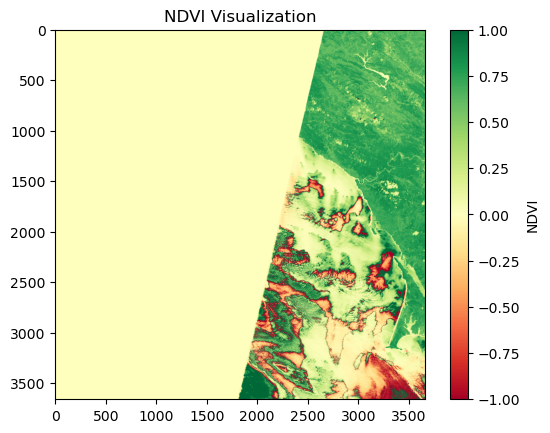

In [6]:
import matplotlib.pyplot as plt
import numpy as np

ndvi = np.load(r"C:\Users\user\Documents\GitHub\Nasa_Space_Apps_challenge\output\HLS.S30.T10SDH.2025088T185021.v2.0_ndvi.npy")

plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar(label="NDVI")
plt.title("NDVI Visualization")
plt.show()


In [10]:
log = pd.read_csv(r"C:\Users\user\Documents\GitHub\Nasa_Space_Apps_challenge\output\ndvi_processing_log.csv")

In [12]:
import pandas as pd

log = pd.read_csv("C:/Users/user/Documents/GitHub/Nasa_Space_Apps_challenge/output/ndvi_processing_log.csv")
print(log.columns)


Index(['key', 'red_band', 'nir_band', 'ndvi_tif', 'ndvi_npy', 'width',
       'height', 'crs'],
      dtype='object')


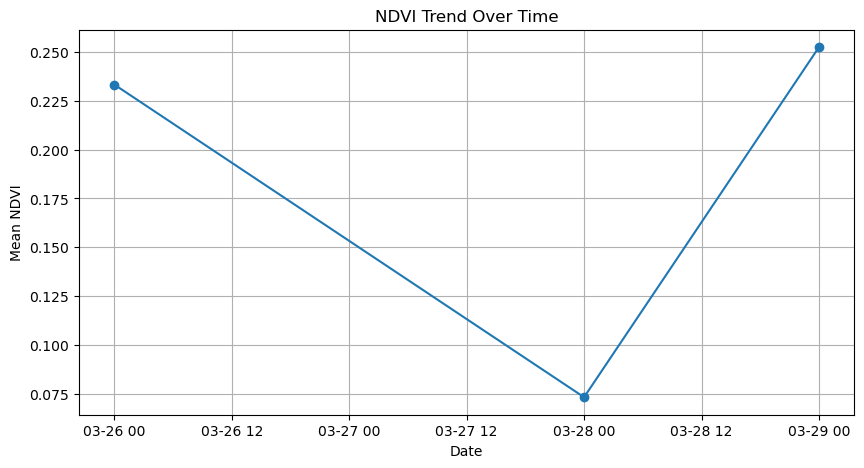

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

log = pd.read_csv("C:/Users/user/Documents/GitHub/Nasa_Space_Apps_challenge/output/ndvi_processing_log.csv")

# Extract the date from the 'key' column
def extract_date(key):
    # Example key: HLS.S30.T10SDH.2025088T185021.v2.0
    julian_str = key.split('.')[3]  # '2025088T185021'
    year = int(julian_str[:4])
    julian_day = int(julian_str[4:7])
    date = datetime(year, 1, 1) + timedelta(days=julian_day - 1)
    return date

log['date'] = log['key'].apply(extract_date)

# Compute mean NDVI for each tile by loading the .npy
def load_mean_ndvi(path):
    try:
        arr = np.load(path)
        return np.nanmean(arr)
    except Exception as e:
        print(f"⚠️ Failed to load {path}: {e}")
        return np.nan

log['mean_ndvi'] = log['ndvi_npy'].apply(load_mean_ndvi)

# Now group by date
daily_ndvi = log.groupby('date')['mean_ndvi'].mean()

# Plot
plt.figure(figsize=(10,5))
plt.plot(daily_ndvi.index, daily_ndvi.values, marker='o')
plt.title("NDVI Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Mean NDVI")
plt.grid(True)
plt.show()


In [34]:
import re
import os
import numpy as np
import pandas as pd
from collections import defaultdict

ndvi_folder = r"C:\Users\user\Documents\GitHub\Nasa_Space_Apps_challenge\output"

# List all NDVI .npy files
ndvi_files = [f for f in os.listdir(ndvi_folder) if f.endswith("_ndvi.npy")]

# Group files by date
ndvi_by_date = defaultdict(list)
for f in ndvi_files:
    m = re.search(r'\.(\d{7})T', f)  # extract '2025088' from filename
    if m:
        date_str = m.group(1)
        ndvi_by_date[date_str].append(os.path.join(ndvi_folder, f))

# Compute daily mean NDVI
daily_means = []
for date_str, files in ndvi_by_date.items():
    arrays = [np.load(f) for f in files]
    daily_mean = np.mean(arrays)
    
    # Convert DOY to datetime
    date_dt = pd.to_datetime(date_str, format='%Y%j')
    daily_means.append({'date': date_dt, 'mean_ndvi': daily_mean})

# Create DataFrame
daily_ndvi_df = pd.DataFrame(daily_means)
daily_ndvi_df.sort_values('date', inplace=True)
daily_ndvi_df.to_csv(os.path.join(ndvi_folder, "daily_mean_ndvi.csv"), index=False)

print(daily_ndvi_df.head())


        date  mean_ndvi
2 2025-03-26        NaN
1 2025-03-28        NaN
0 2025-03-29        NaN


In [35]:
import numpy as np

daily_means = []
for date_str, files in ndvi_by_date.items():
    arrays = [np.load(f) for f in files]
    
    # Stack arrays into 3D array
    stack = np.stack(arrays, axis=0)
    
    # Mask invalid values (if NDVI is out of -1 to 1 range)
    stack = np.where((stack >= -1) & (stack <= 1), stack, np.nan)
    
    daily_mean = np.nanmean(stack)  # ignore NaNs
    date_dt = pd.to_datetime(date_str, format='%Y%j')
    
    daily_means.append({'date': date_dt, 'mean_ndvi': daily_mean})

daily_ndvi_df = pd.DataFrame(daily_means)
daily_ndvi_df.sort_values('date', inplace=True)
daily_ndvi_df.to_csv(os.path.join(ndvi_folder, "daily_mean_ndvi.csv"), index=False)

print(daily_ndvi_df)


        date  mean_ndvi
2 2025-03-26   0.233357
1 2025-03-28   0.073179
0 2025-03-29   0.252506


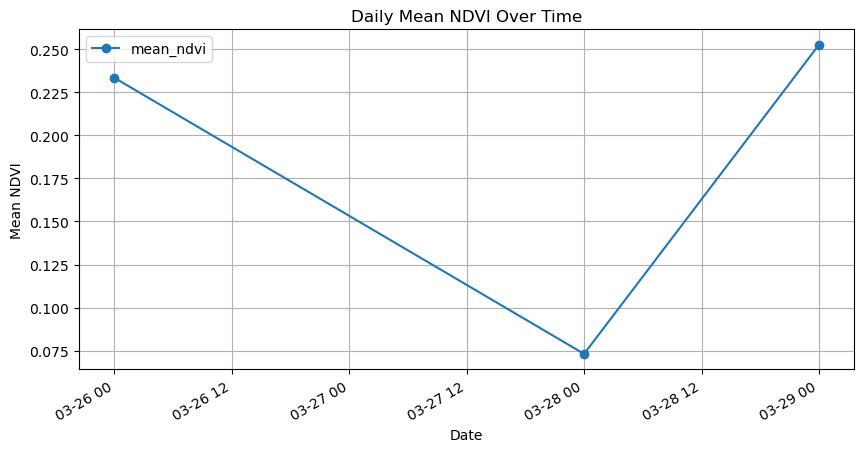

In [36]:
import matplotlib.pyplot as plt

daily_ndvi_df.plot(x='date', y='mean_ndvi', marker='o', figsize=(10,5))
plt.title("Daily Mean NDVI Over Time")
plt.xlabel("Date")
plt.ylabel("Mean NDVI")
plt.grid(True)
plt.show()


Processing NDVI mosaics: 100%|██████████| 3/3 [00:45<00:00, 15.06s/it]


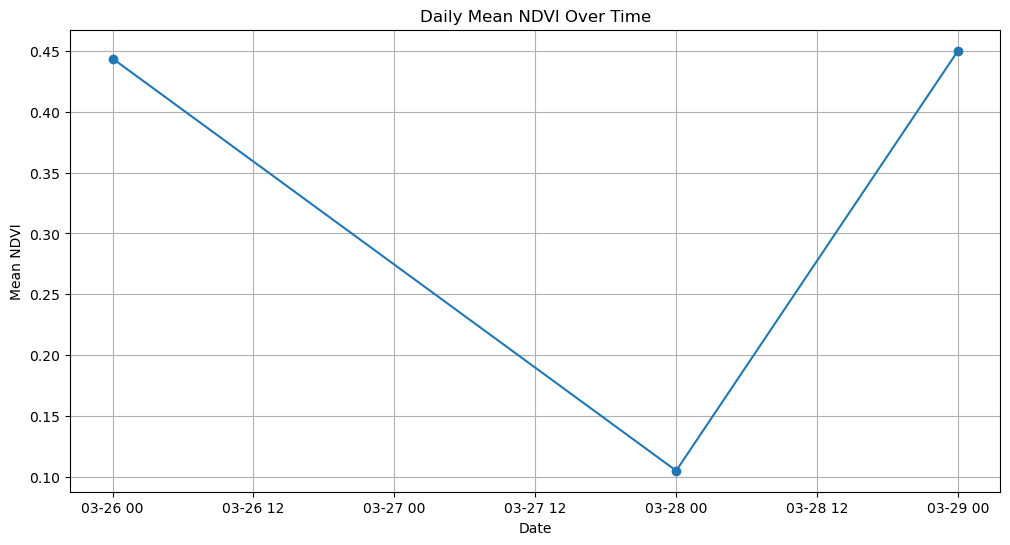

In [38]:
import os
import numpy as np
import rasterio
from rasterio.merge import merge
from rasterio.transform import from_origin
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# Paths
ndvi_folder = "C:/Users/user/Documents/GitHub/Nasa_Space_Apps_challenge/output"
mosaic_folder = os.path.join(ndvi_folder, "daily_mosaics")
os.makedirs(mosaic_folder, exist_ok=True)

# Dummy transform & CRS (replace with real values if known)
pixel_size = 30  # meters per pixel
x_min, y_max = 0, 0  # top-left corner (adjust if needed)
transform = from_origin(x_min, y_max, pixel_size, pixel_size)
crs = "EPSG:4326"  # or your dataset CRS

# Helper to extract date
def extract_date(filename):
    parts = filename.split(".")
    date_str = parts[3][:7]  # '2025088'
    return pd.to_datetime(date_str, format="%Y%j")

# Group NDVI files by date
ndvi_files = [f for f in os.listdir(ndvi_folder) if f.endswith("_ndvi.npy")]
ndvi_by_date = {}
for f in ndvi_files:
    date = extract_date(f)
    if date:
        ndvi_by_date.setdefault(date, []).append(os.path.join(ndvi_folder, f))

# Process each date
daily_means = []

for date, files in tqdm(ndvi_by_date.items(), desc="Processing NDVI mosaics"):
    raster_list = []
    for f in files:
        arr = np.load(f).astype(np.float32)
        
        # Create in-memory raster
        meta = {
            'driver': 'GTiff',
            'height': arr.shape[0],
            'width': arr.shape[1],
            'count': 1,
            'dtype': 'float32',
            'crs': crs,
            'transform': transform
        }
        memfile = rasterio.io.MemoryFile()
        dataset = memfile.open(**meta)
        dataset.write(arr, 1)
        raster_list.append(dataset)
    
    if raster_list:
        # Merge tiles
        mosaic, out_trans = merge(raster_list)
        mosaic = mosaic[0]
        
        # Save mosaic GeoTIFF
        out_meta = meta.copy()
        out_meta.update({"height": mosaic.shape[0],
                         "width": mosaic.shape[1],
                         "transform": out_trans})
        out_tif = os.path.join(mosaic_folder, f"{date.strftime('%Y%m%d')}_ndvi_mosaic.tif")
        with rasterio.open(out_tif, "w", **out_meta) as dest:
            dest.write(mosaic, 1)
        
        # Compute mean NDVI
        mean_ndvi = np.nanmean(mosaic)
        daily_means.append({"date": date, "mean_ndvi": mean_ndvi})

# Save daily mean NDVI CSV
daily_ndvi_df = pd.DataFrame(daily_means).sort_values("date")
daily_ndvi_df.to_csv(os.path.join(mosaic_folder, "daily_mean_ndvi.csv"), index=False)

# Plot NDVI trend
plt.figure(figsize=(12,6))
plt.plot(daily_ndvi_df['date'], daily_ndvi_df['mean_ndvi'], marker='o')
plt.title("Daily Mean NDVI Over Time")
plt.xlabel("Date")
plt.ylabel("Mean NDVI")
plt.grid(True)
plt.show()
